## Decision Tree

A decision tree is a supervised machine learning paradigm for classifying or regressing data with discrete or continuous inputs. The decision  tree model islimited because it may only make decisions along the axes of the data, meaning it is not robust to rotation of the data. Below I have implemented the decision classification model.

The decision tree model steps along every axis and makes a binary split at the point where the greatest number of points are classified. This process is repeated over and over again until a maximum depth is reached. Because it must check every possible split in every dimension, the decision tree is slow compared to other methods. The splits can be considered to be branching from one another as illustrated below, hence the name decision tree. 

<p align="center">
    <img src="DecisionTree.png" width="500">
</p>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

df = pd.read_csv("2015.csv")
X = df[["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]]
df.replace("Eastern Asia", "Asia", inplace = True)
df.replace("Southeastern Asia", "Asia", inplace = True)
df.replace("Southern Asia", "Asia", inplace = True)
df.replace("North America", "NA-WE-ASNZ", inplace = True)
df.replace("Western Europe", "NA-WE-ASNZ", inplace = True)
df.replace("Australia and New Zealand", "NA-WE-ASNZ", inplace = True)
feature_names = list(X.columns)
y = df[["Region"]]

The data to be used for classification consists of happiness scores with economy satisfaction, family satisfaction, life expectancy, freedom, govenrmental trust, and generosity components. These are all in the form of continuous values. Additionally, for the purpose of clustering, I am using the region as a categorical response label. I have modified the regions from their original reporting as obtained via Kaggle in order to make more even the size of distinct class labels. With this being said, there are still far more sub-saharan african nations than any other group. For comparison, it is the same data used in the KNN example and Bagging/Boosting examples. 

In [3]:
from sklearn.model_selection import train_test_split
X = X.values
y= y.values
regions, y = np.unique(y, return_inverse=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [4]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=30, random_state=99)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=99)

The decision classification tree is initialized here with a max depth of 30. This is done in response to the number of distinct regions. With a shallower depth, it would be possible that only a binary distinction could be made for each class.

|--- Health (Life Expectancy) <= 0.46
|   |--- Generosity <= 0.10
|   |   |--- class: 3
|   |--- Generosity >  0.10
|   |   |--- Generosity <= 0.35
|   |   |   |--- class: 5
|   |   |--- Generosity >  0.35
|   |   |   |--- Family <= 0.85
|   |   |   |   |--- Family <= 0.52
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Family >  0.52
|   |   |   |   |   |--- class: 2
|   |   |   |--- Family >  0.85
|   |   |   |   |--- class: 5
|--- Health (Life Expectancy) >  0.46
|   |--- Health (Life Expectancy) <= 0.87
|   |   |--- Happiness Score <= 5.87
|   |   |   |--- Generosity <= 0.31
|   |   |   |   |--- Family <= 1.15
|   |   |   |   |   |--- Family <= 1.13
|   |   |   |   |   |   |--- Health (Life Expectancy) <= 0.61
|   |   |   |   |   |   |   |--- Economy (GDP per Capita) <= 0.39
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Economy (GDP per Capita) >  0.39
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Health (Life Exp

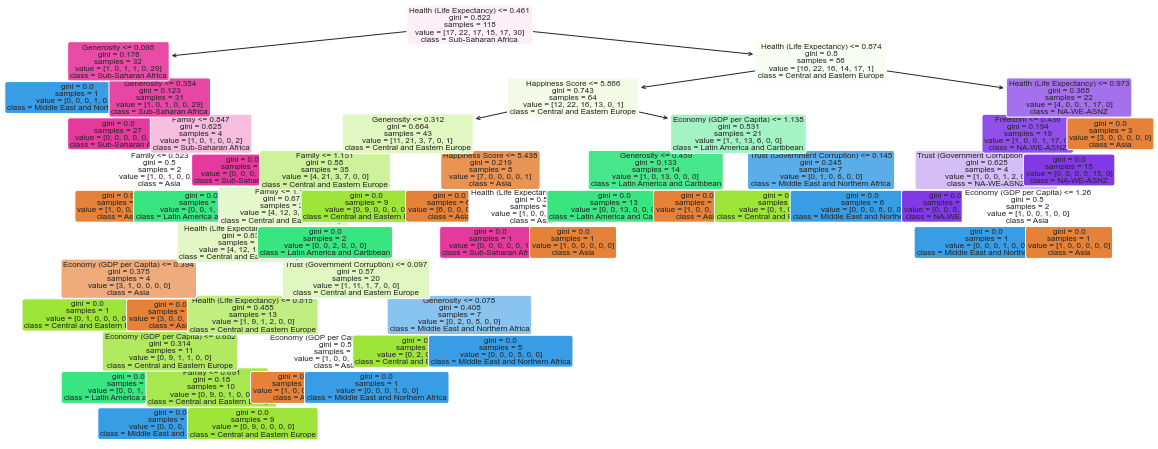

In [7]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text
tree_rules = export_text(decision_tree,
                         feature_names = feature_names)
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = feature_names,
                   class_names = regions,
                   rounded = True,
                   filled = True, 
                   fontsize=8)
plt.show()

The above output visualizes a tree trained on a split of the happiness data. The higher the position of the split on the tree, the greater effect on the classification of the training data. For example here the greatest change in classifications was health score less than  .46 quatifies the greatest degree of seperation for a class. In this case it is Sub-Saharan Africa.

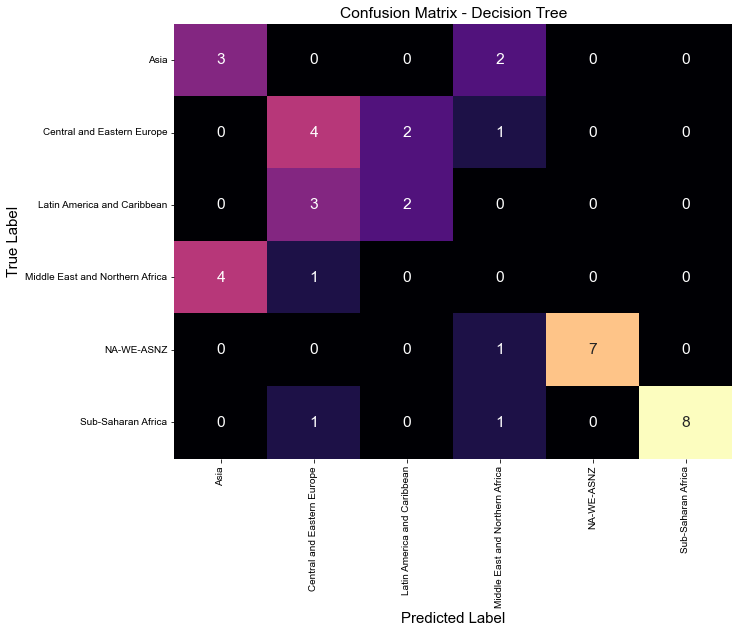

In [6]:
from sklearn import metrics

test_pred_decision_tree = decision_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "Blues", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(regions, rotation = 270)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(regions, rotation=0)
plt.show()

In observing the overall classification quality of the regression tree,  we can see that it does predict some groups well, namely Sub-Saharan Africa and a combination of North American, Western European, and Australian nations. It does a poor job however distinguishing Middle Eastern/Northern African countries. This is possibly a result of the presence of more training samples for some regions than others in the training set. This underscores another drawback of decision classification trees in the need for a decent number of samples for each of the classification labels. 